In [1]:
from environment import Environment
from agent import Agent
import time
from matplotlib import pyplot as plt
from tqdm import tqdm

In [4]:
env = Environment(10)
agent = Agent(env)

start = time.time()
print(agent.it_bellman())
print(time.time() - start)

[17.029594586803626, 20.15071898899205, 15.338323020643402, 17.7867026885381, 11.553474758183235, 12.32230116711017, 16.330532586845578, 18.35048060770874, 10.779755940327453, 10.756906802052747]
0.0003724098205566406


In [5]:
start = time.time()
print(agent.it_bellman())
print(time.time() - start)

[17.02532716492231, 20.146319833623078, 15.334113488043391, 17.7825830245853, 11.54938640098196, 12.318310820018661, 16.326680203514215, 18.346722743166183, 10.776100399881217, 10.753325740440488]
0.0002162456512451172


In [6]:
start = time.time()
print(agent.bellman_matrix())
print(time.time() - start)

[17.05769091 20.17968687 15.36603725 17.81382434 11.58038648 12.3485694
 16.35590368 18.37523674 10.80384003 10.78050547]
0.0028820037841796875


Iterating: 100%|██████████| 400/400 [10:17<00:00,  1.54s/it]


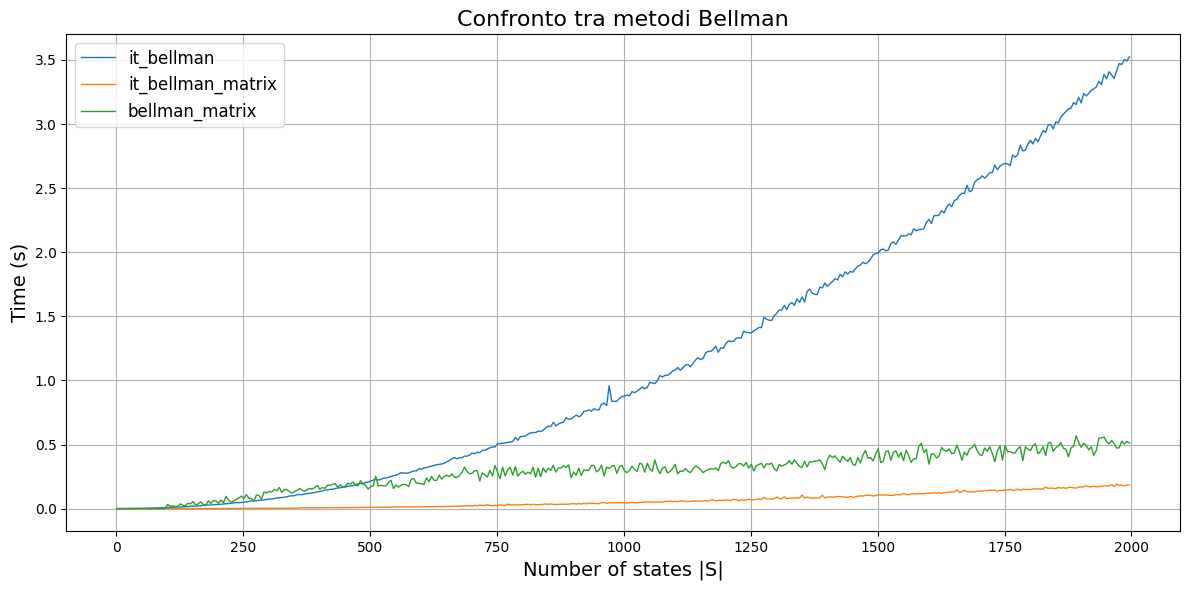

In [9]:
RANGE = (1, 2000, 5) 

it_bellman = {i: 0 for i in range(*RANGE)}
it_bellman_matrix = {i: 0 for i in range(*RANGE)}
bellman_matrix = {i: 0 for i in range(*RANGE)}


for i in tqdm(range(*RANGE), "Iterating"):
    env = Environment(i)
    agent = Agent(env)
    
    start = time.time()
    agent.it_bellman()
    it_bellman[i] = time.time() - start
    
    start = time.time()
    agent.it_bellman_matrix()
    it_bellman_matrix[i] = time.time() - start
    
    start = time.time()
    agent.bellman_matrix()
    bellman_matrix[i] = time.time() - start
    
    
# Prepara i dati per il plot
x = list(it_bellman.keys())
y1 = list(it_bellman.values())
y2 = list(it_bellman_matrix.values())
y3 = list(bellman_matrix.values())

# Creazione del grafico
plt.figure(figsize=(12, 6))
plt.plot(x, y1, label='it_bellman', linewidth=1)
plt.plot(x, y2, label='it_bellman_matrix', linewidth=1)
plt.plot(x, y3, label='bellman_matrix', linewidth=1)

# Personalizzazione del grafico
plt.title("Confronto tra metodi Bellman", fontsize=16)
plt.xlabel("Number of states |S|", fontsize=14)
plt.ylabel("Time (s)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()